# Perceptron and Keras

## Configuration

In [1]:
# load lib
import numpy as np
import pandas as pd
import os

# random seed
np.random.seed(42)

# for figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "./"
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("save fig :", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Perceptron

In [2]:
# load data and lib
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
x = iris.data[:, (2,3)] # extract two features
y = (iris.target == 0).astype(np.int32) # extract label

# fit the perceptron
percept = Perceptron( max_iter=1000, tol=1e-3, random_state=42)
percept.fit(x, y)

# predic a sample
y_pred = percept.predict([[2, 0.5]])
print("y_pred is ", y_pred)

y_pred is  [1]


save fig : perceptron_iris_plot


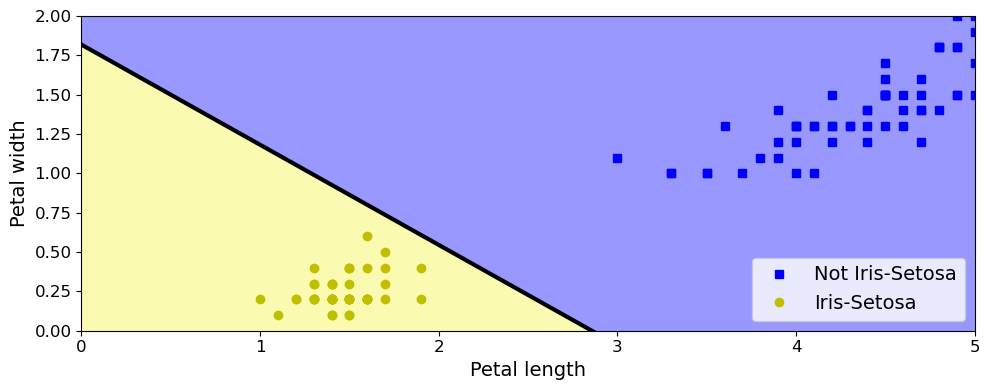

In [3]:
# plot the data and the perceptron line
a = -percept.coef_[0][0] / percept.coef_[0][1]
b = -percept.intercept_ / percept.coef_[0][1]
axes = [0,5,0,2]

x0, x1 = np.meshgrid(
    np.linspace( axes[0], axes[1], 500).reshape(-1,1),
    np.linspace( axes[2], axes[3], 500).reshape(-1,1),
)
x_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = percept.predict(x_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x[y==0, 0], x[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(x[y==1, 0], x[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

## Activation function

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

save fig : activation_functions_plot


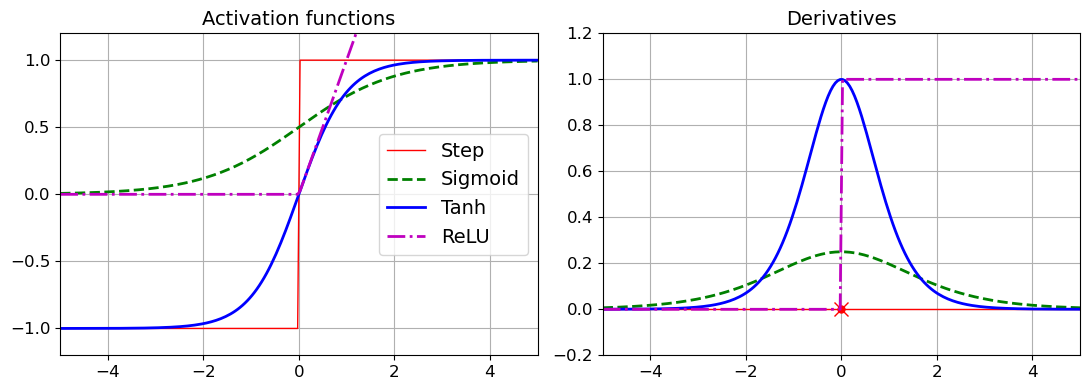

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

## Keras - Image classification

In [6]:
# load tf and keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.18.0
3.7.0


In [7]:
# load data - MNIST
fashion = keras.datasets.fashion_mnist
(x_train_f, y_train_f), (x_test, y_test) = fashion.load_data()
print(x_train_f.shape)
print(y_train_f.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# data processing
x_valid, x_train = x_train_f[:5000] / 255., x_train_f[5000:] / 255.
y_valid, y_train = y_train_f[:5000], y_train_f[5000:]
x_test = x_test / 255.0

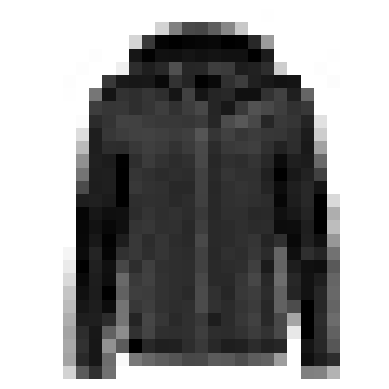

save fig : fashion_mnist_plot


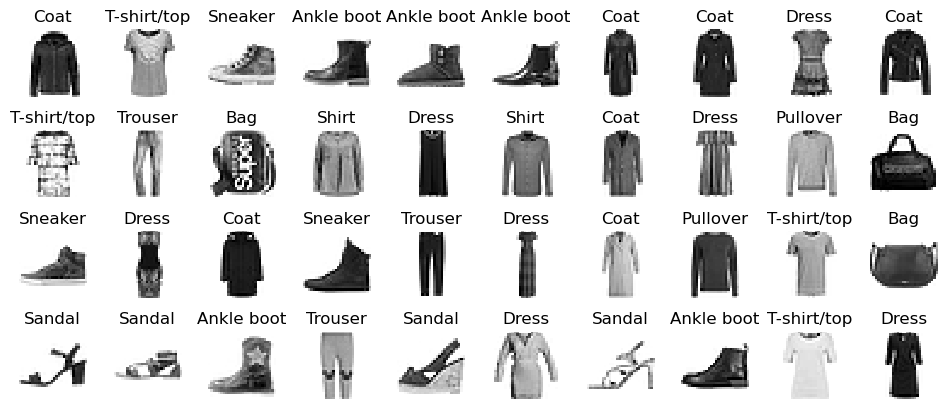

In [9]:
# plot a sample images
plt.imshow( x_train[0],  cmap="binary")
plt.axis("off")
plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [10]:
# random seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
# build the model in keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\gopwi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

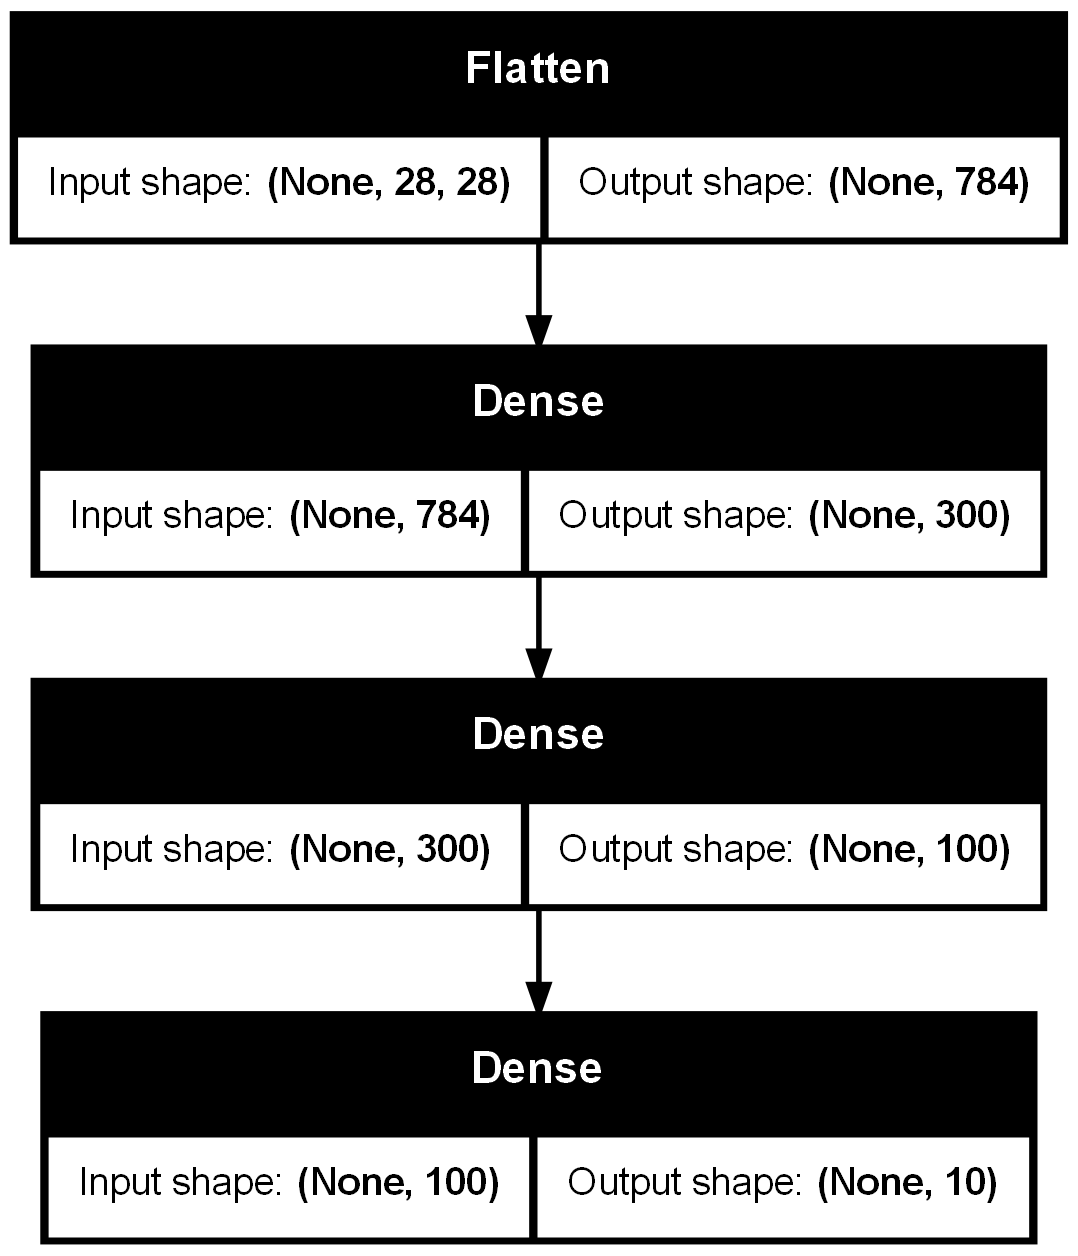

In [14]:
keras.utils.plot_model(model, "./images/my_fashion_mnist_model.png", show_shapes=True)

In [15]:
# inside of the model
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [16]:
model.get_layer(hidden1.name) is hidden1

True

In [17]:
w, b = hidden1.get_weights()
print(w, b)

[[ 0.03210817 -0.00786862 -0.05946428 ...  0.0507641  -0.00563794
   0.04887927]
 [ 0.01772287 -0.00089062 -0.04727805 ... -0.04310926 -0.01544554
  -0.07275738]
 [ 0.00297613 -0.00901583  0.0701315  ...  0.0502585   0.06332804
   0.0212872 ]
 ...
 [-0.03258747  0.02071676  0.05009864 ...  0.07370685  0.06025141
  -0.05018064]
 [ 0.04421364  0.01406489 -0.03422253 ... -0.00937669  0.05302492
   0.0282167 ]
 [-0.06632696  0.05269115 -0.06523426 ... -0.06727507 -0.06646033
  -0.06981038]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [18]:
# compile the model
model.compile( loss="sparse_categorical_crossentropy",
               optimizer="sgd",
               metrics=["accuracy"] )
# equivalant
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

# run learning
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0138 - sparse_categorical_accuracy: 0.6744 - val_loss: 0.5222 - val_sparse_categorical_accuracy: 0.8246
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5029 - sparse_categorical_accuracy: 0.8248 - val_loss: 0.4539 - val_sparse_categorical_accuracy: 0.8460
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4480 - sparse_categorical_accuracy: 0.8417 - val_loss: 0.4189 - val_sparse_categorical_accuracy: 0.8530
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4170 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.3981 - val_sparse_categorical_accuracy: 0.8612
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3948 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.3820 - val_sparse_categorical_accuracy: 0.8654
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3770 - sparse_categorical_accuracy: 0.8660 - val_loss: 0.3693 - val_sparse_categorical_accuracy:

In [19]:
print(history.params)
print(history.epoch)
print(history.history.keys())
print(history.history)

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])
{'loss': [0.7281462550163269, 0.48893240094184875, 0.4420343339443207, 0.4134386479854584, 0.3922732174396515, 0.3754173219203949, 0.3617759346961975, 0.34968239068984985, 0.3390444815158844, 0.3294142186641693, 0.3205629289150238, 0.3124541938304901, 0.3050316870212555, 0.29800891876220703, 0.2915140986442566, 0.28536903858184814, 0.27954432368278503, 0.2741033136844635, 0.2687646448612213, 0.26364102959632874, 0.25886282324790955, 0.2540287375450134, 0.24952204525470734, 0.24504469335079193, 0.24068139493465424, 0.2366018444299698, 0.2323755919933319, 0.22842496633529663, 0.2245861142873764, 0.2207604944705963], 'sparse_categorical_accuracy': [0.7606363892555237, 0.8306182026863098, 0.8443090915679932, 0.85430908203125, 0.86087274

save fig : keras_learning_curves_plot


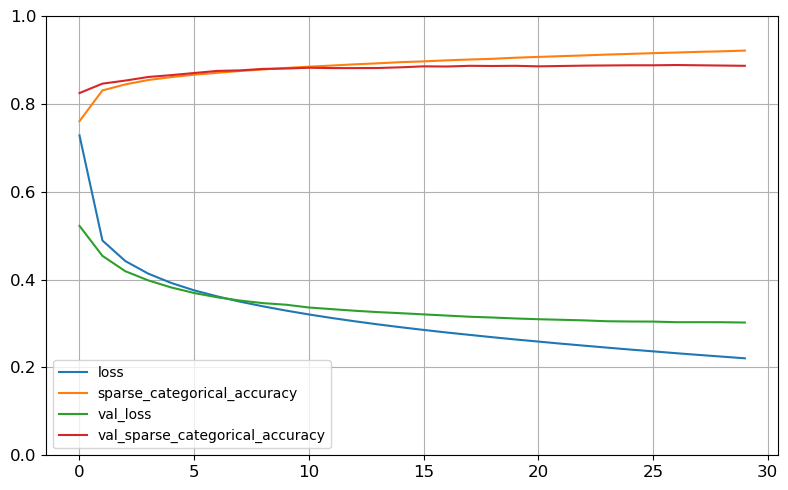

In [20]:
# plot acc and loss
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3419 - sparse_categorical_accuracy: 0.8790 
[0.3388056755065918, 0.8802000284194946]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.03 0.   0.96]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[9 2 1]
save fig : fashion_mnist_images_plot


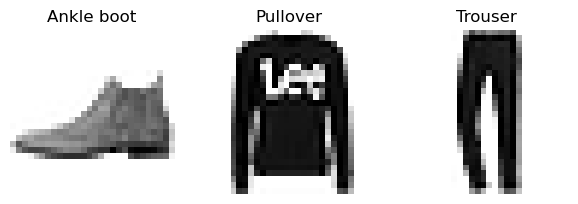

In [21]:
# evaluation and prediction for test samples
print(model.evaluate(x_test, y_test))
print(model.predict(x_test[:3]).round(2))
print(np.argmax( model.predict( x_test[:3]) , axis=-1 ) )

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## Keras - MLP Regression|

In [22]:
# load lib and data
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
# set random seeds
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
# set model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# run learning
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# test setup
mes_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/30
  1/363 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - loss: 4.5200

C:\Users\gopwi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9255 - val_loss: 2.0922
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.9491 - val_loss: 0.7151
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.7384 - val_loss: 0.6350
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.6832 - val_loss: 0.6048
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.6480 - val_loss: 0.5741
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.6181 - val_loss: 0.5457
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.5917 - val_loss: 0.5206
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.5684 - val_loss: 0.4977
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.5479 - val_loss: 0.4780
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.5303 - val_loss: 0.4613
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.5152 - val_loss: 0.4471
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s

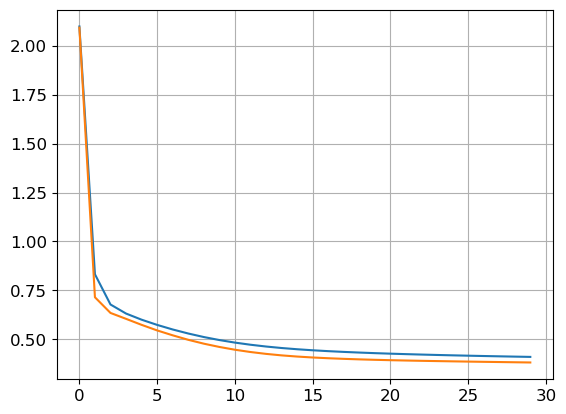

{'verbose': 'auto', 'epochs': 30, 'steps': 363}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'val_loss'])
{'loss': [2.0982260704040527, 0.8324921131134033, 0.6781105399131775, 0.6318821310997009, 0.6004891991615295, 0.5738847255706787, 0.5504851937294006, 0.5299282073974609, 0.5119290947914124, 0.4965221881866455, 0.48349449038505554, 0.47259601950645447, 0.4634525179862976, 0.4558456242084503, 0.449547678232193, 0.4442684054374695, 0.4397892355918884, 0.435935914516449, 0.4325718879699707, 0.4295850396156311, 0.4269291162490845, 0.42453494668006897, 0.42234647274017334, 0.4203066825866699, 0.4184027314186096, 0.4166109263896942, 0.41492730379104614, 0.4133501350879669, 0.4118507206439972, 0.4104098677635193], 'val_loss': [2.0921928882598877, 0.7150644659996033, 0.6349772214889526, 0.6047989130020142, 0.5741377472877502, 0.5456556081771851, 0.5206356644630432, 0.4977461099624634, 0.4780130088329315, 0.

In [25]:
# plot loss
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()
print(history.params)
print(history.epoch)
print(history.history.keys())
print(history.history)

In [26]:
# prediction
y_pred

array([[0.5430089],
       [1.7621036],
       [3.4589796]], dtype=float32)

## Save and Load

In [27]:
# set model and fit
model1 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model1.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model1.evaluate(X_test, y_test)
print(history.params)
print(history.epoch)
print(history.history.keys())
print(history.history)
model1.predict(X_new)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0884 - val_loss: 0.8631
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.8667 - val_loss: 0.7236
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.7731 - val_loss: 0.6645
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.7177 - val_loss: 0.6172
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.6699 - val_loss: 0.5758
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.6268 - val_loss: 0.5392
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.5878 - val_loss: 0.5084
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.5536 - val_loss: 0.4848
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.5243 - val_loss: 0.4693
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.5000 - val_loss: 0.4542
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.4676
{'verbose': 'auto', 'epochs': 10, 'steps': 363}
[0, 1, 2, 3, 4,

array([[1.0342066],
       [1.5020621],
       [2.9892962]], dtype=float32)

In [28]:
# save model
model1.save("my_keras_model.keras")

In [29]:
# load model
model2 = keras.models.load_model("my_keras_model.keras")
model2.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[1.0342066],
       [1.5020621],
       [2.9892962]], dtype=float32)

In [30]:
# save weight
model1.save_weights("my_keras_weights.weights.h5")

In [31]:
# load weight
model2.load_weights("my_keras_weights.weights.h5")

In [32]:
# check the weights
model1.weights[0] == model2.weights[0]

<tf.Tensor: shape=(8, 30), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         Tru

## Callback / Rollback in the learning

In [33]:
# load lib
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
# set model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [35]:
# set callback at the best loss and rollback
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.keras") # rollback to the best loss
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.7256 - val_loss: 1.4927
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1162 - val_loss: 0.7734
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.7798 - val_loss: 0.6629
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.6922 - val_loss: 0.6207
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.6498 - val_loss: 0.5826
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.6178 - val_loss: 0.5484
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.5910 - val_loss: 0.5206
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.5678 - val_loss: 0.4983
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.5477 - val_loss: 0.4796
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.5305 - val_loss: 0.4642
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.5013


In [36]:
# stop after 10 steps after the best loss
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5157 - val_loss: 0.4511
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.5026 - val_loss: 0.4401
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.4911 - val_loss: 0.4319
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.4808 - val_loss: 0.4345
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4715 - val_loss: 0.4508
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4630 - val_loss: 0.4627
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.4552 - val_loss: 0.4645
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.4482 - val_loss: 0.4632
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.4419 - val_loss: 0.4626
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.4362 - val_loss: 0.4620
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4313 - val_loss: 0.4609
Epoch 12/100
363/363 ━━━━━━

In [37]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

318/363 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.4845
val/train: 0.95
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4808 - val_loss: 0.4345


## hyper-paramter tuning

In [38]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [41]:
# def model
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(build_model)


In [42]:
# run learning
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
  1/363 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - loss: 7.8987

C:\Users\gopwi\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0992 - val_loss: 3.9724
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.6115 - val_loss: 0.6582
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.5181 - val_loss: 0.4459
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.4832 - val_loss: 0.4263
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.4634 - val_loss: 0.4099
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4506 - val_loss: 0.4001
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.4414 - val_loss: 0.3930
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.4345 - val_loss: 0.3876
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.4288 - val_loss: 0.3830
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.4241 - val_loss: 0.3793
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.4201 - val_loss: 0.3763
Epoch 12/100
363/363 ━━━━━━━━━━━━━━

KerasRegressor(
	model=<function build_model at 0x000001A77ED68C20>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [45]:
# test loss
mse_test = keras_reg.score(X_test, y_test)
mes_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step


0.4061051309108734

In [46]:
# some prediction
y_pred = keras_reg.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([0.58876044, 1.6867529 , 4.21708   ], dtype=float32)

In [148]:
# different approach
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense
import scikeras
from scikeras.wrappers import KerasRegressor
import keras_tuner
import keras

In [151]:

# def model
#def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
def build_model(hp) :
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=hp["input_shape"]))
    for layer in range(hp["n_hidden"]):
        model.add(keras.layers.Dense(hp["n_neurons"], activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=hp["learning_rate"])
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = KerasRegressor(build_model)

#param_distribs = {
#hp = {
#    "n_hidden": [0, 1, 2, 3],
#    "n_neurons": np.arange(1, 100).tolist(),
#    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
#}
hp = keras_tuner.HyperParameters()
hp.Choice("n_hidden", [0, 1, 2, 3])
hp.Choice("n_neurons", np.arange(1, 100).tolist())
hp.Choice("learning_rate", reciprocal(3e-4, 3e-2).rvs(1000).tolist())


0.0006495462308248234

In [150]:
keras_reg.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

TypeError: build_model() missing 1 required positional argument: 'hp'

AttributeError: 'Sequential' object has no attribute 'best_estimator_'

In [131]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [147]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.
